# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Dzaki Gastiadirrijal  
**NIM:** 122140030

##### **Link Repository GitHub:** https://github.com/Dzaki-G/Dzaki_122140030_Hands-on-Multimedia

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

Import Library yang dibutuhkan

In [176]:
# Import Library yang dibutuhkan
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import os 
import urllib.request
import dlib

# Cek versi library yang diinstal
print(f"Versi numpy: {np.__version__}")
print(f"Versi matplotlib: {plt.matplotlib.__version__}")
print(f"Versi OpenCV: {cv2.__version__}")

Versi numpy: 1.26.4
Versi matplotlib: 3.10.7
Versi OpenCV: 4.11.0


### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


#### **Jawab soal 1:**

1. Inisiasi path gambar soal 1 dan menampilkan gambar serta infromasi img shapenya.

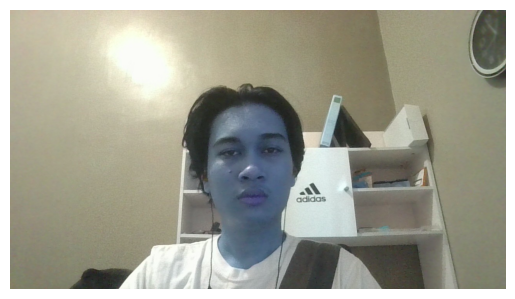

Shape gambar soal 1: (720, 1280, 3)


In [177]:
# Path gambar
img_path_soal1 = os.path.join(os.getcwd(), 'assets_ws4', 'Q1_self.jpg')


# Baca gambar
img_soal1 = cv2.imread(img_path_soal1)

# Tampilkan gambar dengan matplotlib
plt.imshow(img_soal1)
plt.axis('off')
plt.show()

print("Shape gambar soal 1:", img_soal1.shape)


2. Melakukan cropping pada area wajah dan latar belakang, lalu menampilkan hasilnya.

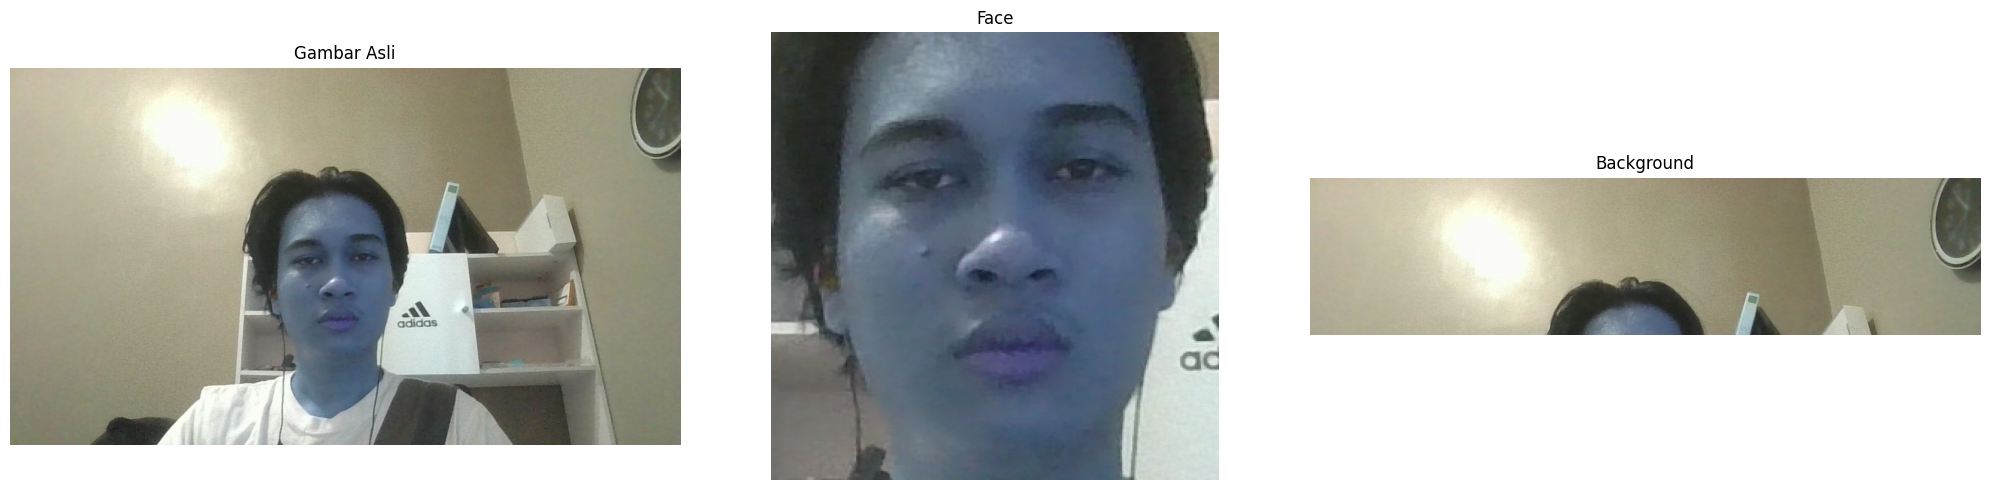

True

In [178]:
# Melakukan pemotongan
img_cropped_face =  img_soal1[270:570, 465:765] 
img_cropped_background = img_soal1[0:300, 0:1280]

# Plot gambar
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Original no Crop
axs[0].imshow(img_soal1)
axs[0].set_title('Gambar Asli')
axs[0].axis('off')

# Original cropped image
axs[1].imshow(img_cropped_face)
axs[1].set_title('Face')
axs[1].axis('off')

# Background cropped image
axs[2].imshow(img_cropped_background)
axs[2].set_title('Background')
axs[2].axis('off')


plt.tight_layout()
plt.show()


# Simpan Hasil Modifikasi
output_dir = os.path.join(os.getcwd(), 'results_ws4')
os.makedirs(output_dir, exist_ok=True)

output_path_face = os.path.join(output_dir, 'R1_muka_cropped.jpg')
cv2.imwrite(output_path_face, img_cropped_face)

output_path_background = os.path.join(output_dir, 'R1_background_cropped.jpg')
cv2.imwrite(output_path_background, img_cropped_background)

3. Resize hasil crop menjadi 920x920 piksel.

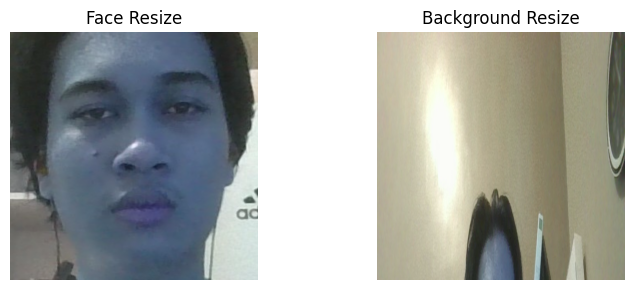

Shape wajah sebelum resize: (300, 300, 3)
Shape wajah setelah resize: (920, 920, 3)
Shape background sebelum resize: (300, 1280, 3)
Shape background setelah resize: (920, 920, 3)


True

In [179]:
# Resize cropped image to 920x920 pixels
img_face_resized = cv2.resize(img_cropped_face, (920, 920))
img_background_resized = cv2.resize(img_cropped_background, (920, 920))

# Plot gambar
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Original cropped image
axs[0].imshow(img_face_resized)
axs[0].set_title('Face Resize')
axs[0].axis('off')

# Background resized image
axs[1].imshow(img_background_resized)
axs[1].set_title('Background Resize')
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Print shape before and after resize
print("Shape wajah sebelum resize:", img_cropped_face.shape)
print("Shape wajah setelah resize:", img_face_resized.shape)
print("Shape background sebelum resize:", img_cropped_background.shape)
print("Shape background setelah resize:", img_background_resized.shape)

# Simpan hasil modifikasi gambar
output_path_face_resized = os.path.join(output_dir, 'R1_muka_resized.jpg')
cv2.imwrite(output_path_face_resized, img_face_resized)

output_path_background_resized = os.path.join(output_dir, 'R1_background_resized.jpg')
cv2.imwrite(output_path_background_resized, img_background_resized)

4. Konversi gambar menjadi grayscale dan HSV, lalu menampilkan ketiganya berdampingan.

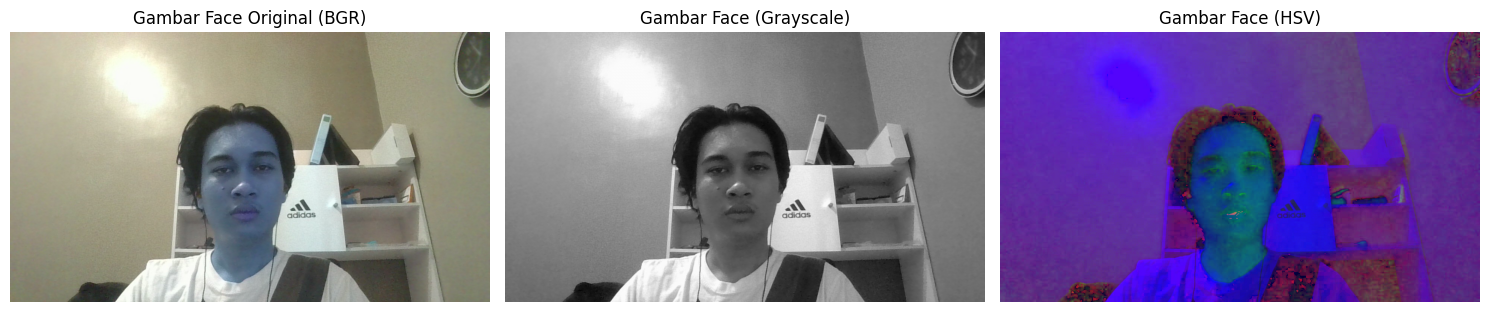

True

In [180]:
# Konversi RGB ke Grayscale dan HSV untuk img
img_gray = cv2.cvtColor(img_soal1, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img_soal1, cv2.COLOR_BGR2HSV)

# Plot hasil konversi
fig, axs = plt.subplots(1, 3, figsize=(15, 10))


axs[0].imshow(img_soal1)
axs[0].set_title("Gambar Face Original (BGR)")
axs[0].axis('off')
axs[1].imshow(img_gray, cmap='gray')
axs[1].set_title("Gambar Face (Grayscale)")
axs[1].axis('off')
axs[2].imshow(img_hsv)
axs[2].set_title("Gambar Face (HSV)")
axs[2].axis('off')

plt.tight_layout()
plt.show()


# Simpan hasil konversi
output_path_gray = os.path.join(output_dir, 'R1_muka_grayscale.jpg')
cv2.imwrite(output_path_gray, img_gray)

output_path_hsv = os.path.join(output_dir, 'R1_muka_hsv.jpg')
cv2.imwrite(output_path_hsv, img_hsv)

5. Menambahkan anotasi teks berisi nama di atas kepala pada gambar hasil crop.

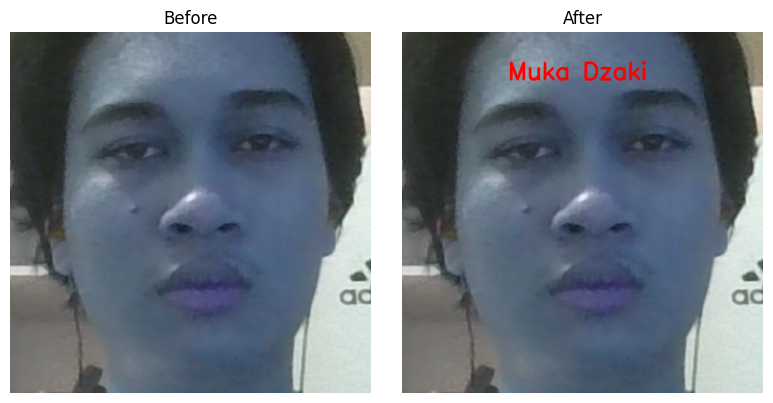

True

In [181]:
img_face_with_name = img_face_resized.copy()

# Menambahkan teks di atas kepala
cv2.putText(img_face_with_name, "Muka Dzaki", (270, 120), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 6)

# Tampilkan gambar before dan after 
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(img_face_resized)
axs[0].set_title("Before")
axs[0].axis('off')

axs[1].imshow(img_face_with_name)
axs[1].set_title("After")
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil gambar dengan teks
output_path_face_with_name = os.path.join(output_dir, 'R1_muka_nama.jpg')
cv2.imwrite(output_path_face_with_name, img_face_with_name) 

#### **Jelaskan efek cropping dan perubahan warna menggunakan Markdown:**

#### 1. Cropping 
adalah proses memotong area tertentu dari gambar menggunakan koordinat piksel sehingga menghasilkan bagian gambar baru yang lebih kecil dan fokus pada objek tertentu, misalnya wajah atau latar belakang. kedua crop yang dilakukan sudah di resize menjadi 920x920 piksel. dimana pada crop wajah karena sudah 1:1 jadi tidak berubah, hanya menambah piksel saja. bada crop background berubah karena yang tadinya persegi panjang menjadi compact ke persegi.



#### 2. Efek konversi warna

##### Grayscale
Konversi ke Grayscale mengubah citra RGB menjadi intensitas keabuan sehingga menghilangkan warna tetapi tetap mempertahankan struktur, kontras, dan tekstur untuk mempermudah analisis seperti deteksi tepi dan segmentasi.

##### HSV
Konversi ke HSV memisahkan warna menjadi Hue, Saturation, dan Value sehingga lebih intuitif untuk manipulasi warna dan sangat cocok untuk segmentasi warna serta tracking objek tanpa memengaruhi tingkat kecerahan.



### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


#### **Jawab soal 2:**

1. Konversi gambar hasil crop ke ruang warna RGB.

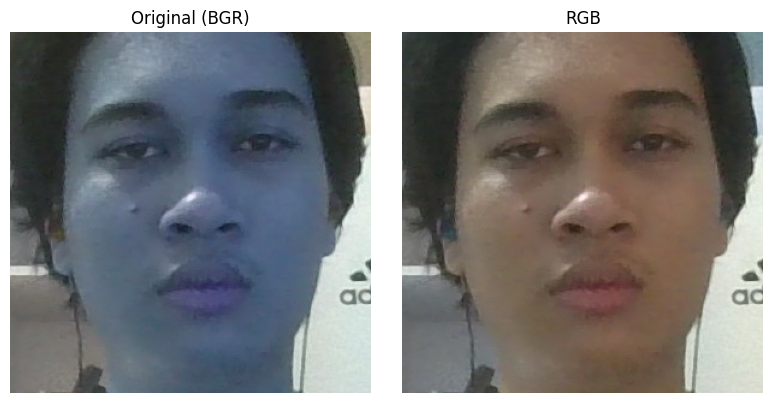

In [182]:
img2_rgb = cv2.cvtColor(img_cropped_face, cv2.COLOR_BGR2RGB)

# Plot gambar
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Original cropped image
axs[0].imshow(img_cropped_face)
axs[0].set_title('Original (BGR)')
axs[0].axis('off')

# Background resized image
axs[1].imshow(img2_rgb)
axs[1].set_title('RGB')
axs[1].axis('off')

plt.tight_layout()
plt.show()

2. Manipulasi channel warna dengan menaikkan intensitas channel merah sebanyak 50 poin dan menurunkan intensitas channel biru sebanyak 30 poin.

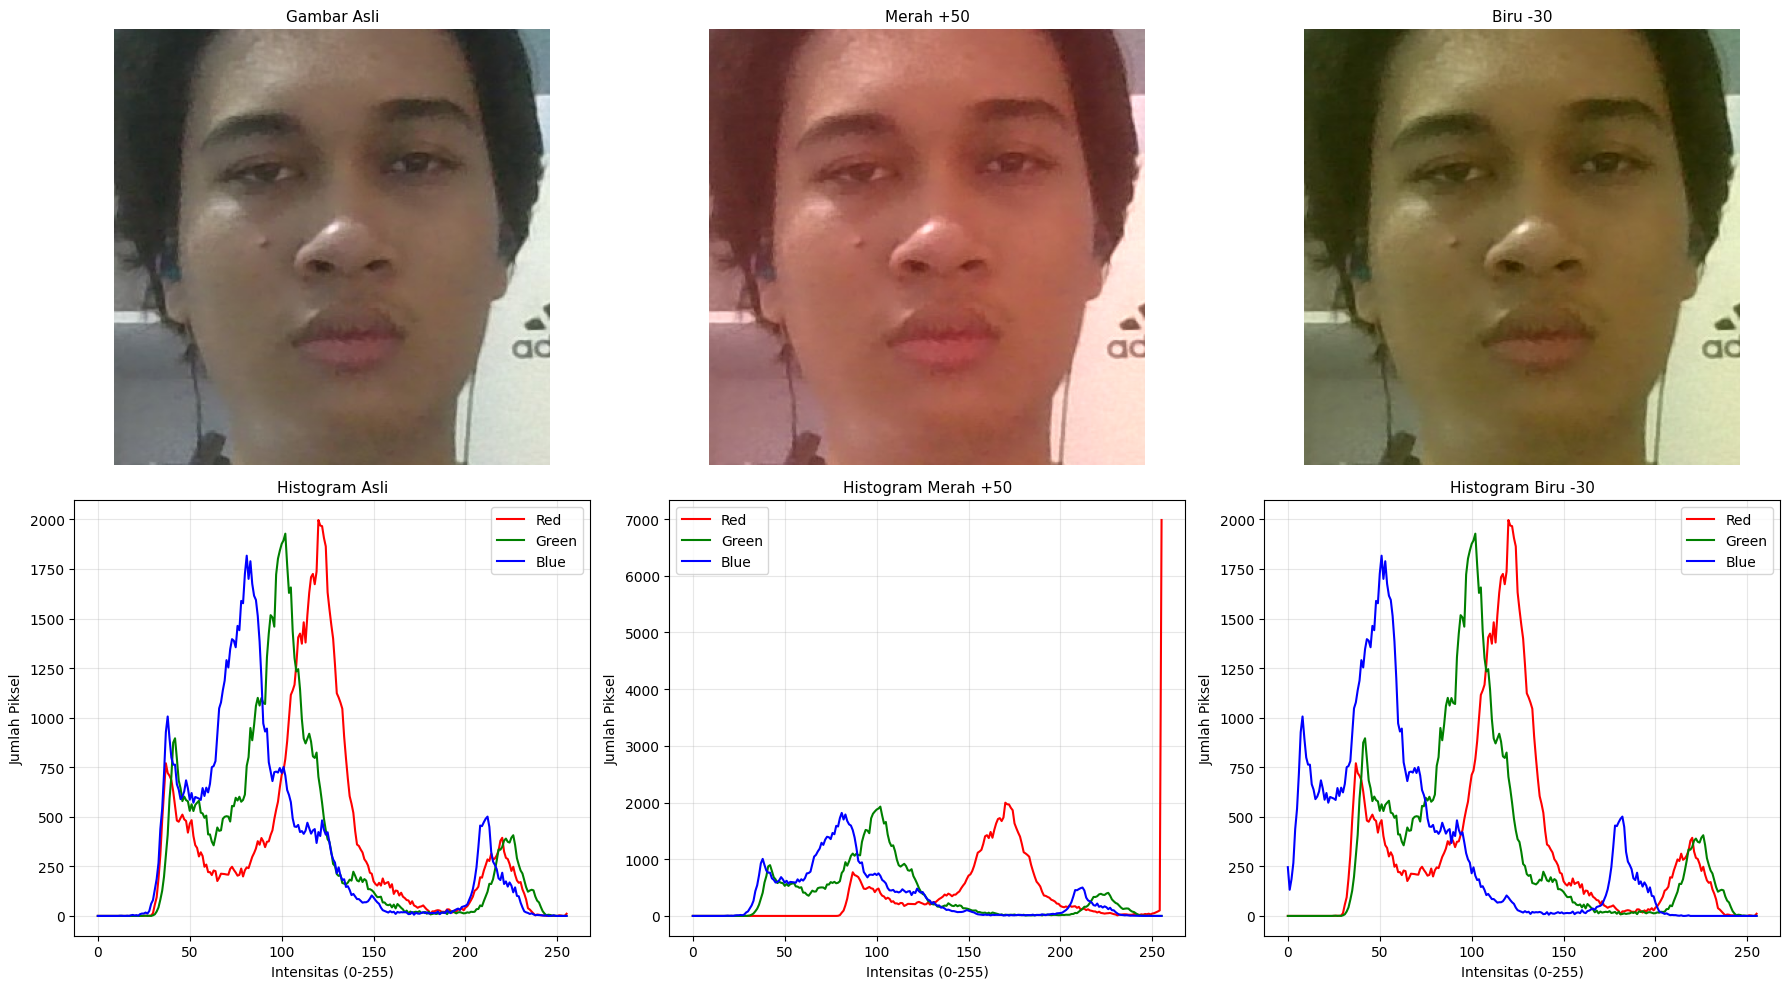

In [183]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Gambar asli
axs[0,0].imshow(img2_rgb)
axs[0,0].set_title("Gambar Asli", fontsize=11)
axs[0,0].axis('off')

# Histogram asli
colors = ('r','g','b')
labels = ('Red','Green','Blue')
for i, (col, label) in enumerate(zip(colors, labels)):
    hist = cv2.calcHist([img2_rgb], [i], None, [256], [0,256])
    axs[1,0].plot(hist, color=col, label=label)

axs[1,0].set_title("Histogram Asli", fontsize=11)
axs[1,0].set_xlabel("Intensitas (0-255)")
axs[1,0].set_ylabel("Jumlah Piksel")
axs[1,0].legend()
axs[1,0].grid(True, alpha=0.3)


# Merah + 50
img2_mod_red = img2_rgb.copy().astype(np.int16)
img2_mod_red[:,:,0] = np.clip(img2_mod_red[:,:,0] + 50, 0, 255) #+50 pada R
img2_mod_red = img2_mod_red.astype(np.uint8)

axs[0,1].imshow(img2_mod_red)
axs[0,1].set_title("Merah +50", fontsize=11)
axs[0,1].axis('off')

# Histogram merah
for i, (col, label) in enumerate(zip(colors, labels)):
    hist = cv2.calcHist([img2_mod_red], [i], None, [256], [0,256])
    axs[1,1].plot(hist, color=col, label=label)

axs[1,1].set_title("Histogram Merah +50", fontsize=11)
axs[1,1].set_xlabel("Intensitas (0-255)")
axs[1,1].set_ylabel("Jumlah Piksel")
axs[1,1].legend()
axs[1,1].grid(True, alpha=0.3)


# Biru -30
img2_mod_blue = img2_rgb.copy().astype(np.int16)
img2_mod_blue[:,:,2] = np.clip(img2_mod_blue[:,:,2] - 30, 0, 255) #-30 pada B
img2_mod_blue = img2_mod_blue.astype(np.uint8)

axs[0,2].imshow(img2_mod_blue)
axs[0,2].set_title("Biru -30", fontsize=11)
axs[0,2].axis('off')

# Histogram biru
for i, (col, label) in enumerate(zip(colors, labels)):
    hist = cv2.calcHist([img2_mod_blue], [i], None, [256], [0,256])
    axs[1,2].plot(hist, color=col, label=label)

axs[1,2].set_title("Histogram Biru -30", fontsize=11)
axs[1,2].set_xlabel("Intensitas (0-255)")
axs[1,2].set_ylabel("Jumlah Piksel")
axs[1,2].legend()
axs[1,2].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


3. Gabungkan kembali channel warna dan simpan gambar hasil modifikasi dalam format .png.

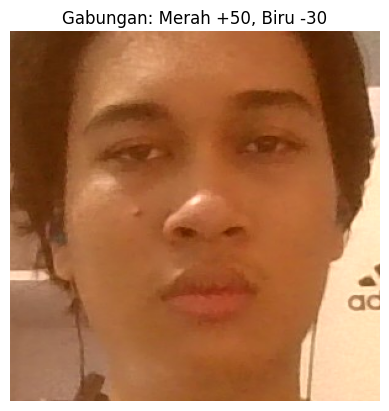

✅ Gambar berhasil disimpan sebagai d:\00 kuliah s7\multimedia\00 github\Dzaki_122140030_Hands-on-Multimedia\results_ws4\R2_gabungan_modifikasi.png


In [184]:
# Gabungan: Merah +50 dan Biru -30
img2_combined = img2_rgb.copy().astype(np.int16)

# +50 pada Red channel (index 0)
img2_combined[:,:,0] = np.clip(img2_combined[:,:,0] + 50, 0, 255)

# -30 pada Blue channel (index 2)
img2_combined[:,:,2] = np.clip(img2_combined[:,:,2] - 30, 0, 255)

# Kembalikan ke uint8
img2_combined = img2_combined.astype(np.uint8)


# Tampilkan hasil gabungan
plt.imshow(img2_combined)
plt.title("Gabungan: Merah +50, Biru -30")
plt.axis('off')
plt.show()

# Simpan hasil ke file PNG
output_path_combined = os.path.join(output_dir, 'R2_gabungan_modifikasi.png')
cv2.imwrite(output_path_combined, cv2.cvtColor(img2_combined, cv2.COLOR_RGB2BGR))
print(f"✅ Gambar berhasil disimpan sebagai {output_path_combined}")

4. Tampilkan histogram per channel (R, G, B) untuk gambar asli dan hasil modifikasi menggunakan matplotlib.pyplot.hist.

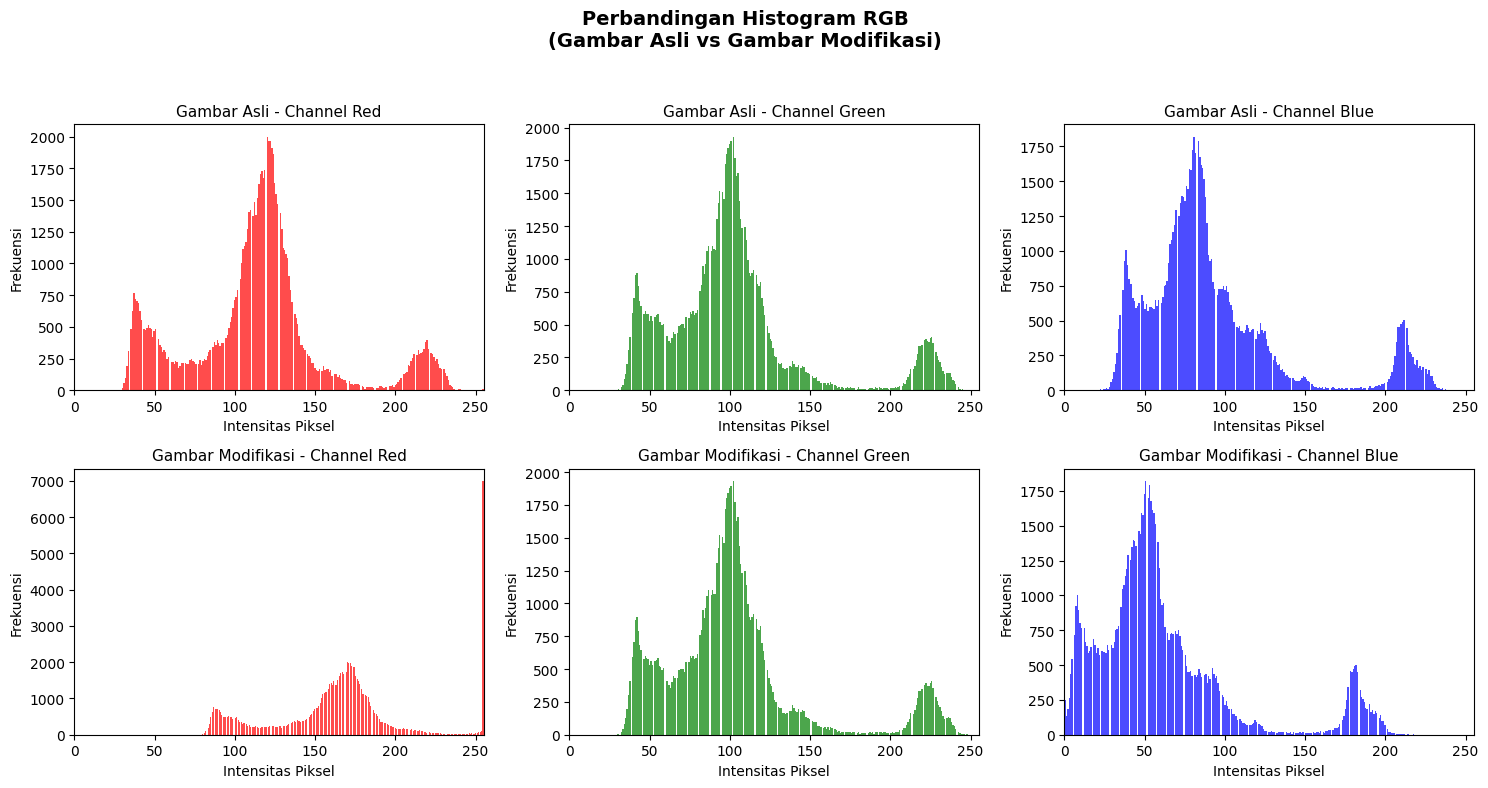

In [185]:
# Siapkan figure untuk menampilkan hasil
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Warna dan label channel
colors = ('r', 'g', 'b')
labels = ('Red', 'Green', 'Blue')

# ===== Histogram gambar asli =====
for i, (col, label) in enumerate(zip(colors, labels)):
    axs[0, i].hist(img2_rgb[:, :, i].ravel(), bins=256, color=col, alpha=0.7)
    axs[0, i].set_title(f"Gambar Asli - Channel {label}", fontsize=11)
    axs[0, i].set_xlim([0, 255])
    axs[0, i].set_xlabel("Intensitas Piksel")
    axs[0, i].set_ylabel("Frekuensi")

# ===== Histogram gambar hasil modifikasi =====
for i, (col, label) in enumerate(zip(colors, labels)):
    axs[1, i].hist(img2_combined[:, :, i].ravel(), bins=256, color=col, alpha=0.7)
    axs[1, i].set_title(f"Gambar Modifikasi - Channel {label}", fontsize=11)
    axs[1, i].set_xlim([0, 255])
    axs[1, i].set_xlabel("Intensitas Piksel")
    axs[1, i].set_ylabel("Frekuensi")

# ===== Atur tampilan layout =====
fig.suptitle("Perbandingan Histogram RGB\n(Gambar Asli vs Gambar Modifikasi)", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Jelaskan dampak perubahan RGB pada warna gambar:**

Perubahan intensitas pada channel warna RGB (Red, Green, Blue) akan mempengaruhi tampilan warna keseluruhan dari gambar. Berikut adalah dampak dari perubahan yang dilakukan:
1. Peningkatan intensitas channel merah sebesar +50 membuat gambar terlihat lebih hangat. Area wajah menjadi sedikit lebih kemerahan dan tampak memiliki nuansa merah muda. Yang dapat dilihat pada histogram juga banyaknya piksel merah pada intensitas besar.
2. Kemudian ketika intensitas channel biru diturunkan sebanyak 30 poin, warna biru pada gambar akan menjadi lebih redup. Hal ini dapat mengurangi kecerahan warna biru pada gambar. Sehingga warna gambar menjadi terlihat lebih kuning. Yang dapat dilihat pada histogram juga banyaknya piksel biru pada intensitas kecil.

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


#### **Jawab soal 3:**

1. Gambar objek dengan background bertekstur.

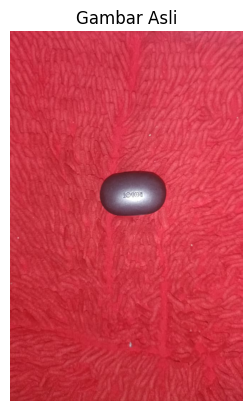

In [186]:
# Inisiasi path
img3 = os.path.join(os.getcwd(), 'assets_ws4', 'Q2_ap.jpg')

# Baca gambar
img3 = cv2.imread(img3)

# Konversi ke RGB
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli
plt.imshow(img3_rgb)
plt.title("Gambar Asli")
plt.axis('off')
plt.show()


2. Edge detection (Canny) dan menampilkan hasilnya.

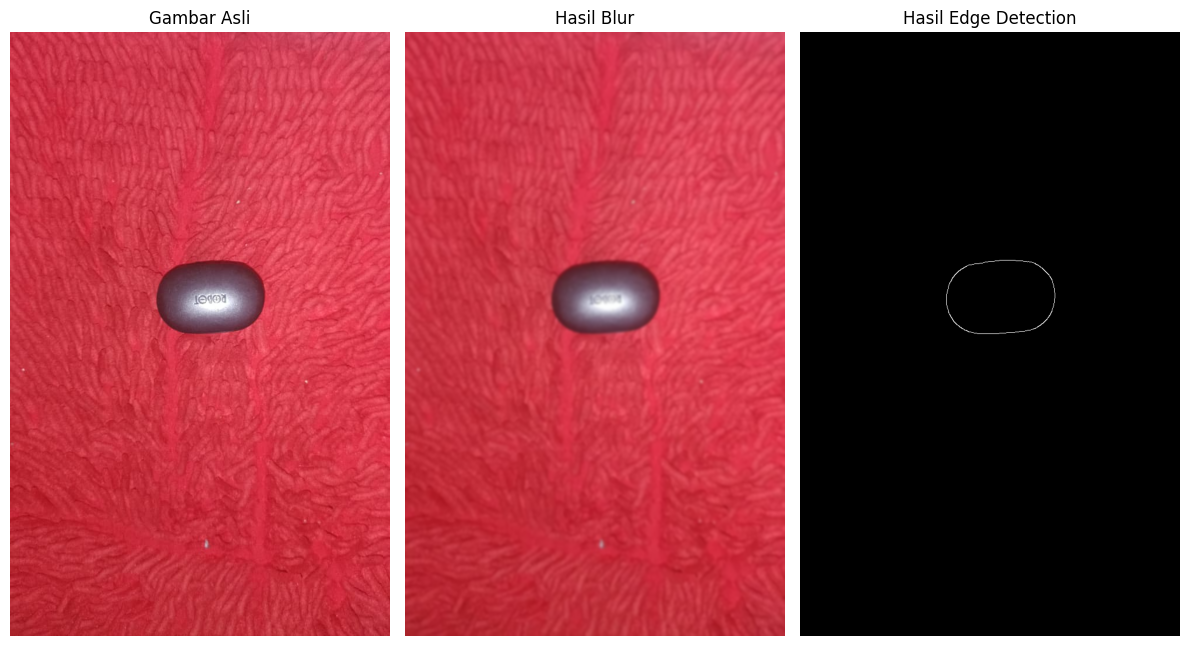

✅ Hasil edge detection disimpan sebagai d:\00 kuliah s7\multimedia\00 github\Dzaki_122140030_Hands-on-Multimedia\results_ws4\R3_edge_detection.jpg


In [187]:
img3_blur = cv2.GaussianBlur(img3_rgb, (11, 11), 0)

# Canny Edge Detection
edges = cv2.Canny(img3_blur, 50, 200)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 7))

# Gambar Asli
axs[0].imshow(img3_rgb)
axs[0].set_title('Gambar Asli')
axs[0].axis('off')

# Hasil Blur
axs[1].imshow(img3_blur)
axs[1].set_title('Hasil Blur')
axs[1].axis('off')

# Hasil Edge Detection
axs[2].imshow(edges, cmap='gray')
axs[2].set_title('Hasil Edge Detection')
axs[2].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil edge detection
output_path_edges = os.path.join(output_dir, 'R3_edge_detection.jpg')
cv2.imwrite(output_path_edges, edges)
print(f"✅ Hasil edge detection disimpan sebagai {output_path_edges}")

3. Membuat bounding box di sekitar objek hasil segmentasi.

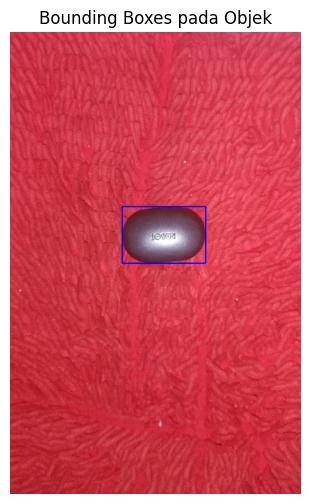

✅ Gambar bounding box berhasil disimpan sebagai d:\00 kuliah s7\multimedia\00 github\Dzaki_122140030_Hands-on-Multimedia\results_ws4\R3_hasil_bb.jpg


In [188]:
# Temukan kontur dari hasil Canny
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Salinan gambar RGB untuk menampilkan bounding box
img_bboxes = img3_rgb.copy()

# Loop setiap kontur dan buat bounding box
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_bboxes, (x, y), (x + w, y + h), (0, 0, 255), 2)  # kotak warna biru

# Tampilkan hasilnya
plt.figure(figsize=(8, 6))
plt.imshow(img_bboxes)
plt.title("Bounding Boxes pada Objek")
plt.axis('off')
plt.show()

# Simpan hasil bounding box 
output_path_bboxes = os.path.join(output_dir, 'R3_hasil_bb.jpg')
cv2.imwrite(output_path_bboxes, cv2.cvtColor(img_bboxes, cv2.COLOR_RGB2BGR))

print(f"✅ Gambar bounding box berhasil disimpan sebagai {output_path_bboxes}")


4. Menerapkan filter blur dan filter sharpening, lalu membandingkan hasil keduanya.

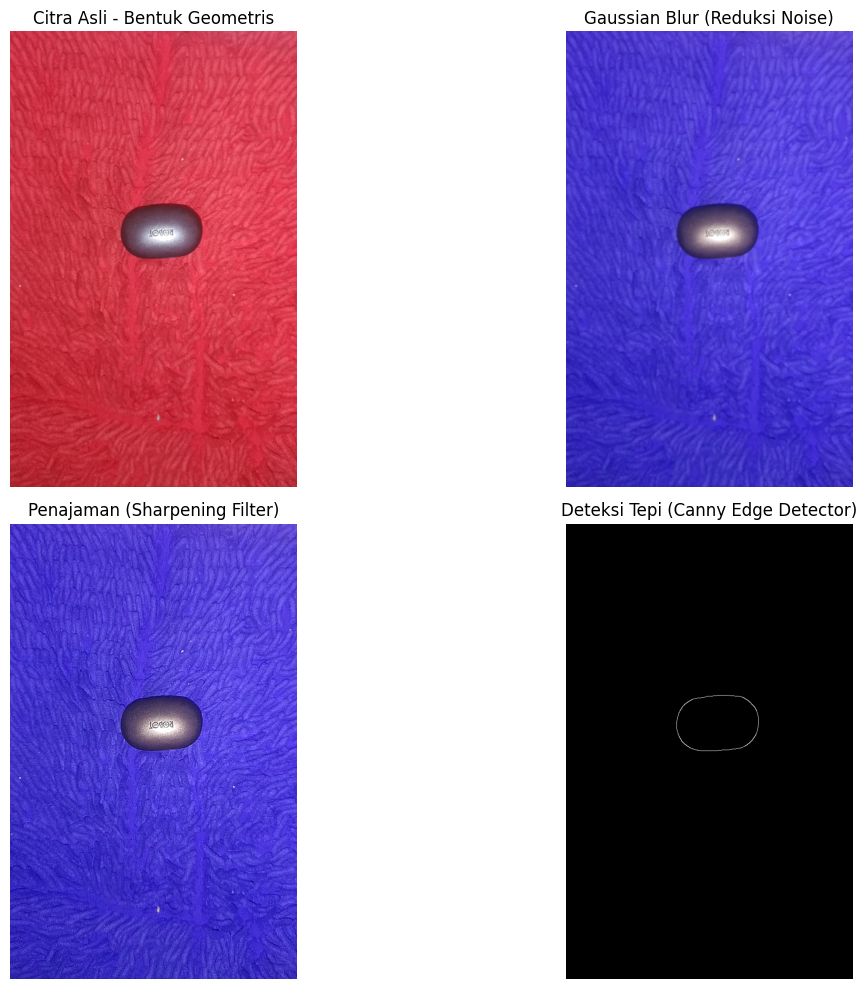

In [189]:
# Gaussian Blur (reduksi noise)
blur = cv2.GaussianBlur(img3_rgb, (5, 5), 0)
blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

# Sharpening (penajaman)
kernel_sharp = np.array([[0, -1, 0],
 [-1, 5, -1],
 [0, -1, 0]])
sharp = cv2.filter2D(img3_rgb, -1, kernel_sharp)
sharp_rgb = cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(blur, 70, 400)

# Susun canvas 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Citra Asli
axes[0, 0].imshow(img3_rgb)
axes[0, 0].set_title("Citra Asli - Bentuk Geometris", fontsize=12)
axes[0, 0].axis("off")
# 2. Gaussian Blur
axes[0, 1].imshow(blur_rgb)
axes[0, 1].set_title("Gaussian Blur (Reduksi Noise)", fontsize=12)
axes[0, 1].axis("off")
# 3. Sharpening
axes[1, 0].imshow(sharp_rgb)
axes[1, 0].set_title("Penajaman (Sharpening Filter)", fontsize=12)
axes[1, 0].axis("off")
# 4. Deteksi Tepi Canny
axes[1, 1].imshow(edges, cmap='gray')
axes[1, 1].set_title("Deteksi Tepi (Canny Edge Detector)", fontsize=12)
axes[1, 1].axis("off")

# layout
plt.tight_layout()
plt.show()

#### **Penjelasan pengaruh filter Gaussian Blur dan Sharpening:**

1. **Edge Detection**: Deteksi tepi mampu mengenali kontur objek dengan baik—terutama bentuk powerbank dan port USB—karena perbedaan intensitas yang jelas, sementara preprocessing blur membantu mengurangi noise sehingga hasil deteksi memberikan informasi struktur objek yang berguna.

2. **Gaussian Blur**: Penghalusan detail tekstur dan noise pada gambar akan melembutkan tepi objek serta mengaburkan detail halus, yang berguna sebagai preprocessing untuk edge detection.

3. **Sharpening**: Peningkatan ketajaman tepi dan detail objek akan membuat tekstur, port, serta logo tampak lebih jelas dan tegas, namun berisiko memunculkan noise yang sebelumnya tersamarkan.

Hasil dari bounding box yang terbentuk mendeteksi objek yang sebelumnya sudah di deteksi menggunakan edge detection Canny yang kurang terlihat jelas, karena bentuk objek (airpod) memiliki bentuk bulat sehingga hasil bounding boxnya sesuai.

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

Inisiasi Path Gambar Soal 4 dan menampilkan gambar serta informasi img shapenya.

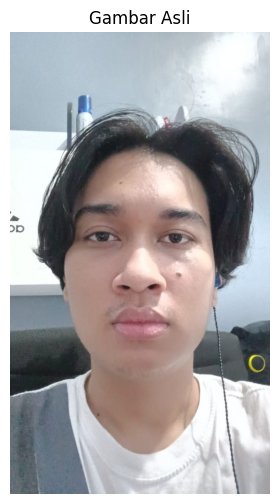

Ukuran gambar: (1599, 899, 3)


In [190]:
# Load the image
img4_path = os.path.join(os.getcwd(), 'assets_ws4', 'Q4_self.jpg')
img_original = cv2.imread(img4_path)

# gambar asli 
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")
plt.axis('off')
plt.show()

img_dlib = img_original.copy()

# Convert to grayscale for processing
gray_faces = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
print(f"Ukuran gambar: {img_original.shape}")


Deteksi wajah dan landmark menggunakan Dlib.

Jumlah wajah terdeteksi: 1


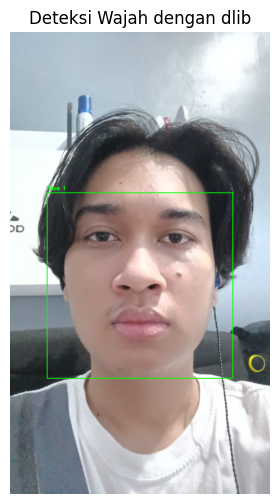

In [191]:
# Inisialisasi dlib face detector
detector = dlib.get_frontal_face_detector()

# Deteksi wajah menggunakan dlib
faces_dlib = detector(gray_faces)

print(f"Jumlah wajah terdeteksi: {len(faces_dlib)}")

# Draw rectangles and labels for dlib
for i, face in enumerate(faces_dlib):
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()

    # Kotak wajah
    cv2.rectangle(img_dlib, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Label
    cv2.putText(img_dlib, f"Face {i+1}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Tampilkan hasil deteksi
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img_dlib, cv2.COLOR_BGR2RGB))
plt.title("Deteksi Wajah dengan dlib")
plt.axis('off')
plt.show()


Menampilkan landmark wajah pada gambar asli dengan menggunakan model shape_predictor_68_face_landmarks.dat dari Dlib.

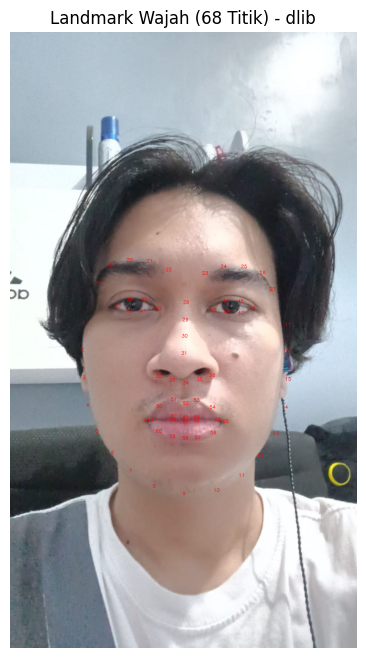

✅ Gambar landmark berhasil disimpan sebagai d:\00 kuliah s7\multimedia\00 github\Dzaki_122140030_Hands-on-Multimedia\results_ws4\R4_landmark_wajah.png


In [192]:
# Path penyimpanan model
predictor_path = os.path.join(os.getcwd(), "shape_predictor_68_face_landmarks.dat")

# Load model predictor
predictor = dlib.shape_predictor(predictor_path)

# Gunakan hasil deteksi wajah sebelumnya
img_landmark = img_original.copy()

# Gambar landmark untuk tiap wajah
for n in range(68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    cv2.putText(img_landmark, str(n+1), (x, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)


# Tampilkan hasil
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_landmark, cv2.COLOR_BGR2RGB))
plt.title("Landmark Wajah (68 Titik) - dlib")
plt.axis('off')
plt.show()

# Simpan gambar
output_path_landmark = os.path.join(output_dir, 'R4_landmark_wajah.png')
cv2.imwrite(output_path_landmark, img_landmark)

print(f"✅ Gambar landmark berhasil disimpan sebagai {output_path_landmark}")


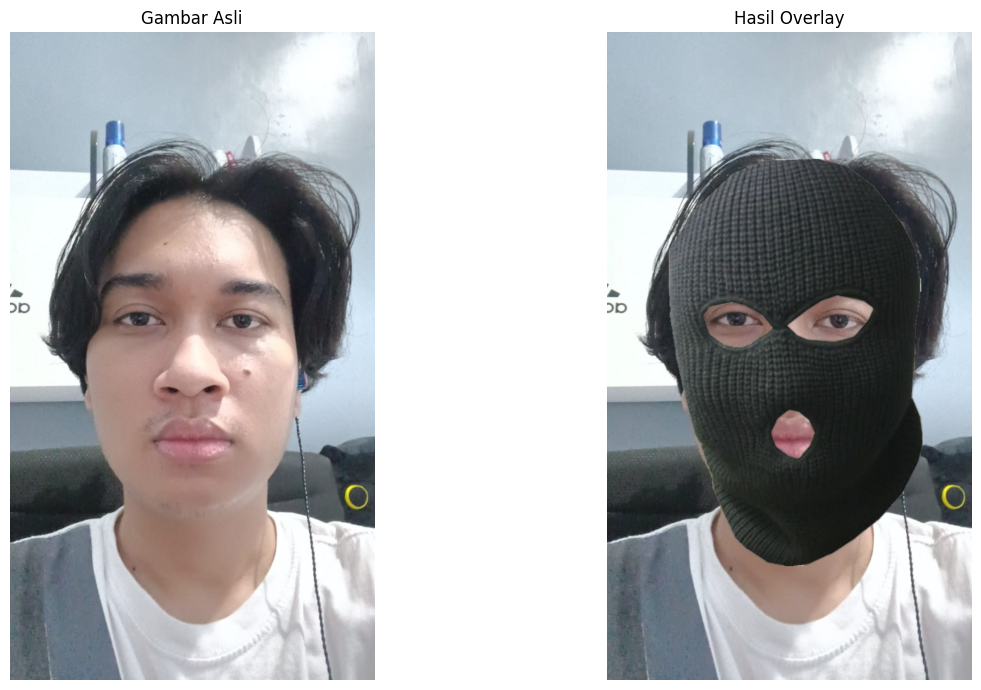

✅ Gambar overlay berhasil disimpan sebagai d:\00 kuliah s7\multimedia\00 github\Dzaki_122140030_Hands-on-Multimedia\results_ws4\R4_overlay.png


In [193]:
# Load gambar overlay (aksesoris mata) 
mask_png_path = os.path.join(os.getcwd(), 'assets_ws4', 'Q4_mask2.png')  # RGBA
mask_png = cv2.imread(mask_png_path, cv2.IMREAD_UNCHANGED)
img_overlay = img_original.copy()

for face in faces_dlib:
    landmarks = predictor(gray_faces, face)

    # Koordinat mata 
    left_eye_pts = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 42)])
    right_eye_pts = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(42, 48)])

    left_eye_center = left_eye_pts.mean(axis=0).astype("int")
    right_eye_center = right_eye_pts.mean(axis=0).astype("int")

    # Hitung sudut & jarak antar mata 
    dx = right_eye_center[0] - left_eye_center[0]
    dy = right_eye_center[1] - left_eye_center[1]
    angle = np.degrees(np.arctan2(dy, dx))
    eye_distance = np.linalg.norm(right_eye_center - left_eye_center)

    # Skala overlay 
    scale = eye_distance / mask_png.shape[1] * 2.5
    overlay_w = int(mask_png.shape[1] * scale)
    overlay_h = int(mask_png.shape[0] * scale)

    # Resize sebelum rotasi
    mask_resized = cv2.resize(mask_png, (overlay_w, overlay_h), interpolation=cv2.INTER_AREA)
    M = cv2.getRotationMatrix2D((overlay_w // 2, overlay_h // 2), angle, 1.0)
    glasses_rotated = cv2.warpAffine(
        mask_resized, M, (overlay_w, overlay_h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(0, 0, 0, 0)
    )

    # Titik tengah antar mata
    eyes_center = (
        (left_eye_center[0] + right_eye_center[0]) // 2,
        (left_eye_center[1] + right_eye_center[1]) // 2
    )

    # Posisi overlay
    offset_x = 20
    offset_y = 100
    x1 = int(eyes_center[0] - overlay_w / 2 + offset_x)
    y1 = int(eyes_center[1] - overlay_h / 2 + offset_y)
    x2 = x1 + overlay_w
    y2 = y1 + overlay_h

    # Batas frame
    x1_crop = max(0, x1)
    y1_crop = max(0, y1)
    x2_crop = min(img_overlay.shape[1], x2)
    y2_crop = min(img_overlay.shape[0], y2)

    # Cek area overlay valid
    overlay_crop_x1 = x1_crop - x1
    overlay_crop_y1 = y1_crop - y1
    overlay_crop_x2 = overlay_crop_x1 + (x2_crop - x1_crop)
    overlay_crop_y2 = overlay_crop_y1 + (y2_crop - y1_crop)

    glasses_region = glasses_rotated[
        overlay_crop_y1:overlay_crop_y2,
        overlay_crop_x1:overlay_crop_x2
    ]

    if glasses_region.shape[0] == 0 or glasses_region.shape[1] == 0:
        continue

    # Pisahkan RGBA 
    b, g, r, a = cv2.split(glasses_region)
    overlay_rgb = cv2.merge((b, g, r))
    mask = a.astype(float) / 255.0

    # Alpha blending 
    for c in range(3):
        img_overlay[y1_crop:y2_crop, x1_crop:x2_crop, c] = (
            mask * overlay_rgb[:, :, c] +
            (1 - mask) * img_overlay[y1_crop:y2_crop, x1_crop:x2_crop, c]
        )


# Tampilkan hasil 
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
axs[0].set_title("Gambar Asli")
axs[1].imshow(cv2.cvtColor(img_overlay, cv2.COLOR_BGR2RGB))
axs[1].set_title("Hasil Overlay")

for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

# Simpan hasil overlay
output_path_overlay = os.path.join(output_dir, 'R4_overlay.png')
cv2.imwrite(output_path_overlay, img_overlay)

print(f"✅ Gambar overlay berhasil disimpan sebagai {output_path_overlay}")


#### **Penjelasan posisi overlay dan tantangan yang dihadapi selama implementasi:**

Dalam proses pemasangan mask pada wajah, kesulitan yang dialami adalah mencari titik-titik landmark. Untuk mata digunakan landmark 36–41 (mata kiri) dan 42–47 (mata kanan). Juga perhitungan titik-titik tersebut dihitung titik tengah masing-masing mata, lalu dihitung jarak dan sudut antar mata. titik titik itu digunakan untuk mengatur posisi, ukuran, dan rotasi mask agar sesuai dengan bentuk dan kemiringan wajah.

**Kesulitan:** memahami konsep dan perhitungan dari posisi titik titik landmark wajah, kemudian untuk menyesuaikan ukuran objek mask agar proporsional dengan wajah pada gambar.

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

1. Inisiasi path gambar soal 5 dan menampilkan gambar untuk review singkat.

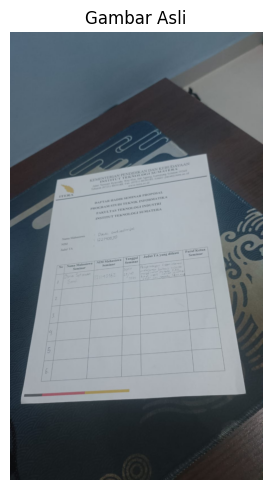

In [194]:
# inisiasi path
img5_path = os.path.join(os.getcwd(), 'assets_ws4', 'Q5_kertas.jpg')
img5 = cv2.imread(img5_path)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.imshow(img5)
axs.set_title("Gambar Asli")
axs.axis('off')
plt.tight_layout()
plt.show()

2. Konversi ke grayscale.

In [195]:
# Konversi ke grayscale
img5_gray = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)

3. Deteksi tepi dengan cara manual

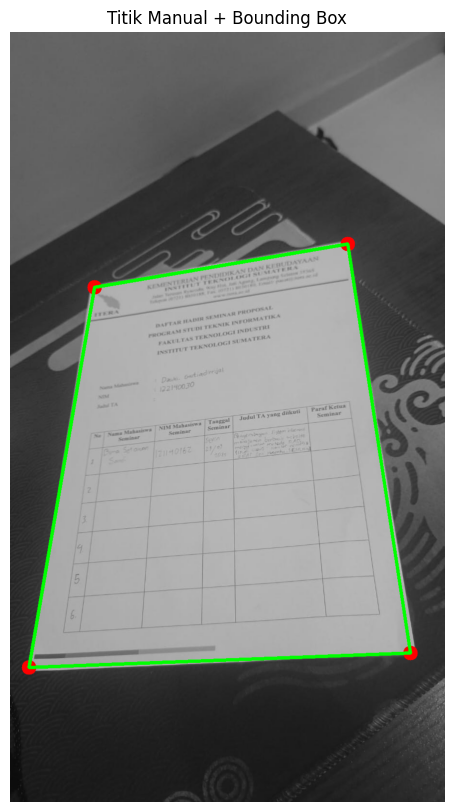

In [196]:
# Salin gambar grayscale untuk menggambar titik dan garis
img5_gray_box = cv2.cvtColor(img5_gray, cv2.COLOR_GRAY2RGB).copy()

# Titik manual dari Anda
points = [
    (175, 530),   # kiri-atas
    (700, 440),   # kanan-atas
    (830, 1290),  # kanan-bawah
    (39, 1320)    # kiri-bawah
]

# Pastikan menjadi numpy array
points_np = np.array(points, dtype=np.int32)

# Gambar lingkaran pada setiap titik
for (x, y) in points:
    cv2.circle(img5_gray_box, (x, y), 15, (255, 0, 0), -1)  # titik biru

# Gambar garis penghubung
cv2.polylines(img5_gray_box, [points_np], isClosed=True, color=(0, 255, 0), thickness=5)

# Tampilkan hasil
plt.figure(figsize=(6, 10))
plt.imshow(img5_gray_box)
plt.title("Titik Manual + Bounding Box")
plt.axis("off")
plt.show()


4. Koreksi perspektif (perspective correction)

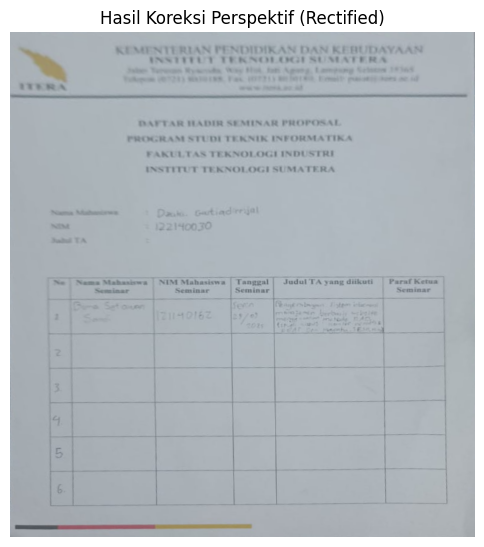

✅ Gambar rectified berhasil disimpan sebagai d:\00 kuliah s7\multimedia\00 github\Dzaki_122140030_Hands-on-Multimedia\results_ws4\R5_perspektif.jpg


In [202]:
#  Titik sumber (dari bounding box manual) 
src_pts = np.array([
    (175, 530),   # kiri-atas
    (700, 440),   # kanan-atas
    (830, 1290),  # kanan-bawah
    (39, 1320)    # kiri-bawah
], dtype=np.float32)

# Tentukan ukuran output (estimasi kertas rectified) 
# Lebar dan tinggi dihitung dari jarak antar titik
width_top = np.linalg.norm(src_pts[1] - src_pts[0])
width_bottom = np.linalg.norm(src_pts[2] - src_pts[3])
max_width = int(max(width_top, width_bottom))

height_left = np.linalg.norm(src_pts[3] - src_pts[0])
height_right = np.linalg.norm(src_pts[2] - src_pts[1])
max_height = int(max(height_left, height_right))

# Titik tujuan (rectified) 
dst_pts = np.array([
    (0, 0),                           # kiri-atas
    (max_width - 1, 0),               # kanan-atas
    (max_width - 1, max_height - 1),  # kanan-bawah
    (0, max_height - 1)               # kiri-bawah
], dtype=np.float32)

# Hitung matriks homografi 
H, _ = cv2.findHomography(src_pts, dst_pts)

#  Warp perspective 
img5_warp = cv2.warpPerspective(img5, H, (max_width, max_height))

#  Tampilkan hasil koreksi perspektif 
plt.figure(figsize=(6, 10))
plt.imshow(img5_warp)
plt.title("Hasil Koreksi Perspektif (Rectified)")
plt.axis("off")
plt.show()

# simpan
output_path_rectified = os.path.join(output_dir, 'R5_perspektif.jpg')

cv2.imwrite(output_path_rectified, cv2.cvtColor(img5_warp, cv2.COLOR_RGB2BGR))

print(f"✅ Gambar rectified berhasil disimpan sebagai {output_path_rectified}")


5. adaptive thresholding

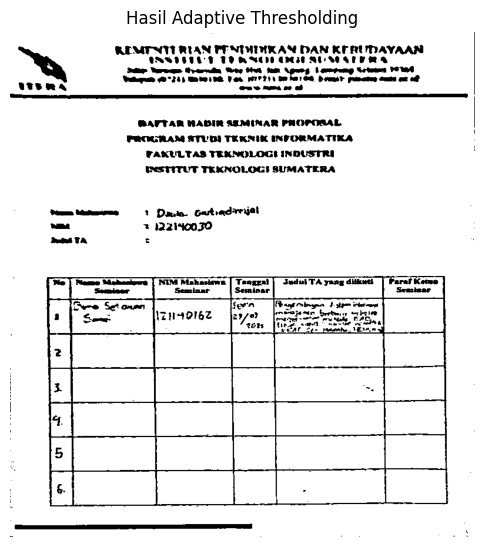

✅ Gambar rectified berhasil disimpan sebagai d:\00 kuliah s7\multimedia\00 github\Dzaki_122140030_Hands-on-Multimedia\results_ws4\R5_adaptive.jpg


In [203]:
# Pastikan konversi ke grayscale setelah warp
img5_warp_gray = cv2.cvtColor(img5_warp, cv2.COLOR_RGB2GRAY)

# Adaptive Thresholding
th_adapt = cv2.adaptiveThreshold(
    img5_warp_gray,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # metode Gaussian (lebih halus untuk pencahayaan tidak rata)
    cv2.THRESH_BINARY,
    51,   # block size
    4     # constant C
)

# Tampilkan hasil
plt.figure(figsize=(6, 10))
plt.imshow(th_adapt, cmap='gray')
plt.title("Hasil Adaptive Thresholding")
plt.axis("off")
plt.show()

# simpan
output_path_rectified = os.path.join(output_dir, 'R5_adaptive.jpg')

cv2.imwrite(output_path_rectified, cv2.cvtColor(th_adapt, cv2.COLOR_RGB2BGR))

print(f"✅ Gambar rectified berhasil disimpan sebagai {output_path_rectified}")


6. Menampilkan setiap tahap pemrosesan dalam satu grid agar mudah dibandingkan.

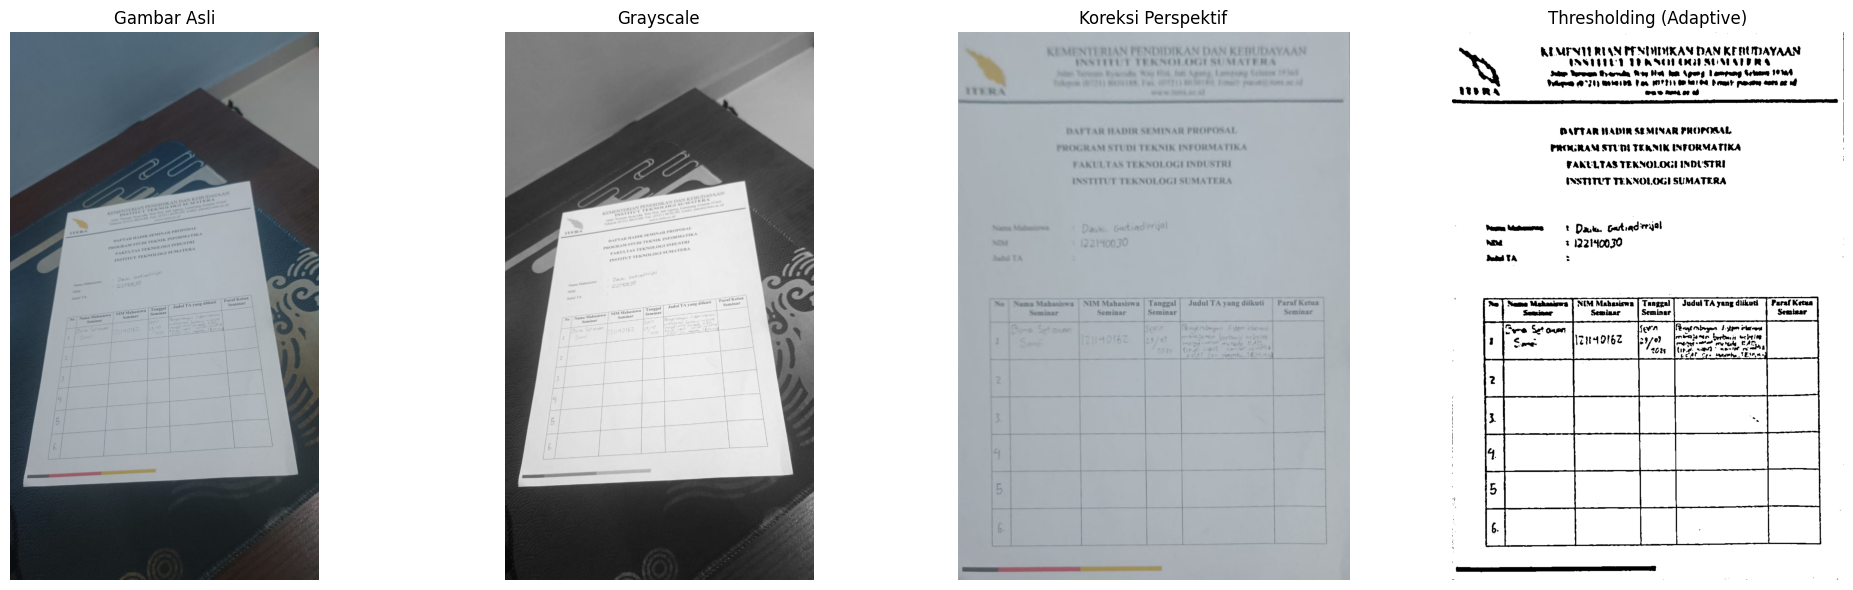

In [199]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

axs[0].imshow(img5)
axs[0].set_title("Gambar Asli")
axs[0].axis('off')

axs[1].imshow(img5_gray, cmap='gray')
axs[1].set_title("Grayscale")
axs[1].axis('off')

axs[2].imshow(warped)
axs[2].set_title("Koreksi Perspektif")
axs[2].axis('off')

axs[3].imshow(img_adapt, cmap='gray')
axs[3].set_title("Thresholding (Adaptive)")
axs[3].axis('off')

plt.tight_layout()
plt.show()


#### Penjelasan Tahapan Pemrosesan

**Gambar yang diambil oleh saya agak blur yang menyebabkan adaptive threshold tidak tajam dan bila value cv2.adaptiveThreshold saya turunkan/naikan sudah saya coba dan makin buram/makin jelek**

#### 1. Konversi ke Grayscale
- **Fungsi:** Mengubah gambar berwarna menjadi abu abu
- **Manfaat:**
    - Mengurangi kompleksitas data dengan menghilangkan informasi warna
    - Mempermudah analisis tekstur dan bentuk
    - Mengurangi noise dan variasi yang tidak diperlukan
    - Persiapan yang baik untuk thresholding dan deteksi tepi

#### 2. Deteksi tepi manual
- **Fungsi:** Penentuan garis batas dokumen dilakukan secara manual (oleh pengguna) guna memastikan penandaan kontur objek memiliki akurasi yang tinggi.

#### 3. Koreksi Perspektif
- **Fungsi:** Mentransformasi citra yang terdistorsi menjadi tampak frontal/tegak lurus
- **Manfaat:**
    - Memperbaiki distorsi perspektif dari pengambilan gambar miring
    - Membuat dokumen terlihat seperti dipindai dari atas
    - Memudahkan pembacaan teks dan analisis konten
    - Standarisasi orientasi untuk pemrosesan selanjutnya

#### 4. Adaptive Thresholding
- **Fungsi:** Memisahkan objek dari latar belakang dengan ambang batas lokal adaptif
- **Manfaat:**
    - Menangani variasi pencahayaan yang tidak merata
    - Menghasilkan binarisasi yang lebih baik dibanding threshold global
    - Mempertahankan detail pada area dengan kontras rendah
    - Cocok untuk dokumen dengan bayangan atau iluminasi tidak seragam

#### Bagaimana teknik ini meningkatkan kualitas visual citra
- Gambar menjadi lebih mudah dibaca meskipun masih buram
- Konten dokumen terlihat lebih jelas
- Menghilangkan distraksi dari orientasi yang tidak ideal

# Lampiran

## 📚 Referensi Materi

1. [Image Processing Week 1](https://github.com/informatika-itera/IF25-40305-handson/blob/main/8_image_processing_week1.ipynb)
2. [Image Processing Week 2](https://github.com/informatika-itera/IF25-40305-handson/blob/main/9_image_processing_week2.ipynb)
3. [Image Processing Week 3](https://github.com/informatika-itera/IF25-40305-handson/blob/main/10_image_processing_week3.ipynb)

## 🤖 Bantuan AI (ChatGPT)

[https://chatgpt.com/share/691ae662-a9b8-8001-838d-d0ddc1bb6391](https://chatgpt.com/share/691ae662-a9b8-8001-838d-d0ddc1bb6391) 


### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.